**sklearn**
# 第一章 模型预处理
## 1.1 从外部源获取样本数据

In [1]:
import matplotlib

In [3]:
import sklearn

In [4]:
import numpy

$$1/2*1/n=2$$

$$ z = frac{x}{y} $$

 $E = mc^2$

In [14]:
%matplotlib inline  #这样图象就会出现在Notebook里面，而不是一个新窗口里。

In [9]:
from sklearn import datasets  #scikit-learn的内置数据库在 datasets 模块里

In [10]:
import numpy as np

In [13]:
datasets.*? #就会看到 datasets 模块的指令列表

In [15]:
datasets.load_*? #较小的测试数据集可以通过 datasets.load_*? 查看

In [25]:
#datasets.fetch_*?  #另外一些数据集需要通过datasets.fetch_*? 下载，这些数据集更大

In [21]:
boston = datasets.load_boston()

In [26]:
print(boston.DESCR)  #DESCR 将列出数据集的一些概况。下面我们来下载一个数据集：

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [27]:
housing = datasets.fetch_california_housing()  #下载一个数据集

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to C:\Users\Administrator\scikit_learn_data


In [28]:
print(housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




当这些数据集被加载时，它们并不是直接转换成*Numpy*数组。它们是 **Bunch** 类
型。*Bunch*是Python常用的数据结构。基本可以看成是一个*词典*，它的键被实例对
象作为属性使用。
网络上 Bunch 对象有不同的实现；自己写一个也不难。scikit-learn用基本模块定义 Bunch 。

In [29]:
X, y = boston.data, boston.target #用 data 属性连接数据中包含自变量的Numpy数组，用 target 属性连接数据中的因变量。

## There's more…

让你从外部源获取数据集时，它默认会被当前文件夹的 scikit_learn_data/ 放
在里面，可以通过两种方式进行配置：
    - 设置 SCIKIT_LEARN_DATA 环境变量指定下载位置
    - fetch_*? 方法的第一个参数是 data_home ，可以知道下载位置
通过 datasets.get_data_home() 很容易检查默认下载位置。

## See also
- UCI机器学习库（UCI Machine Learning Repository） 是找简单数据集的好地方。
很多scikit-learn的数据集都在那里，那里还有更多的数据集。其他数据源还是著名
的KDD和Kaggle。

## 1.2 创建试验样本数据

In [35]:
datasets.make_*?   #创建样本数据集，用 make_数据集名称 函数

In [36]:
#为了简便，下面我们用 d 表示 datasets ， np 表示 numpy ：
import sklearn.datasets as d
import numpy as np

In [37]:
#创建回归（regression） 数据集：
reg_data = d.make_regression()
reg_data[0].shape,reg_data[1].shape

((100, 100), (100,))

reg_data 默认是一个元组，第一个元素是$100\times100$的矩阵——100个样本，每个样本10个特征（自变量） ，第二个元素是1个因变量，对应自变量的样本数量，也是100个样本。然而，默认情况下，只有10个特征与因变量的相关（参数 n_informative 默认值是10） ，其他90个特征都与。

可以自定义更复杂的数据集。比如，创建一个$1000\times10$的矩阵，5个特征与
因变量相关，误差系数0.2，两个因变量。代码如下所示：

In [38]:
complex_reg_data = d.make_regression(1000, 10, 5, 2, 1.0)
complex_reg_data[0].shape,complex_reg_data[1].shape

((1000, 10), (1000, 2))

分类数据集也很容易创建。很容易创建一个基本均衡分类集，但是这种情况现实中几乎不可能发生——大多数用户不会改变消费习惯，大多数交易都不是虚假的，等等。因此，创建一个非均衡数据集更有意义：

In [43]:
classification_set = d.make_classification(weights=[0.1])
np.bincount(classification_set[1])

array([10, 90], dtype=int64)

聚类数据集也可以创建。有一些函数可以为不同聚类算法创建对应的数据集。例如， blobs 函数可以轻松创建**K-Means**聚类数据集：

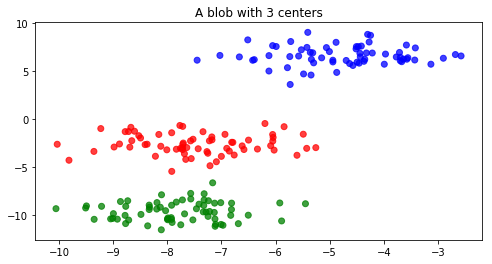

In [46]:
%matplotlib inline
import sklearn.datasets as d
from matplotlib import pyplot as plt
import numpy as np
blobs = d.make_blobs(200)
f = plt.figure(figsize=(8, 4))
ax = f.add_subplot(111)
ax.set_title("A blob with 3 centers")
colors = np.array(['r', 'g', 'b'])
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], color=colors[blobs[1]
.astype(int)], alpha=0.75)

###How it works...
下面让我们从源代码看看scikit-learn是如何生成回归数据集的。下面任何未重新定
义的参数都使用 make_regression 函数的默认值。
其实非常简单。首先，函数调用时生成一个指定维度的随机数组。
- X = np.random.randn(n_samples, n_features)

对于基本均衡数据集，其目标数据集生成方法是：
- ground_truth = np.zeroes((np_samples, n_target))
- ground_truth[:n_informative, :] = 100*np.random.rand(n_informative,n_targets)

然后 X 和 ground_truth 点积加上 bias 就得到了 y ：
- y = np.dot(X, ground_truth) + bias

>点积是一种基本的矩阵运算$A{m \times n} \cdot B{n \times s} = C_{m \times
s}$。因此， y 数据集里面样本数量是 n_samples ，即数据集的行数，因变
量数量是 n_target 。

由于Numpy的传播操作（broadcasting） ， bias 虽然是标量，也会被增加到矩阵
的每个元素上。增加噪声和数据混洗都很简单。这样试验用的回归数据集就完美
了。